In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(data.data, columns=data['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['target'] = data.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['flower_name'] = df.target.apply(lambda x: data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df.flower_name.value_counts()

setosa        50
versicolor    50
virginica     50
Name: flower_name, dtype: int64

In [25]:
df0 = df[0:50]
df1 = df[51:100]
df2 = df[51:]

In [27]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor


In [28]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor


In [29]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Petal Width')

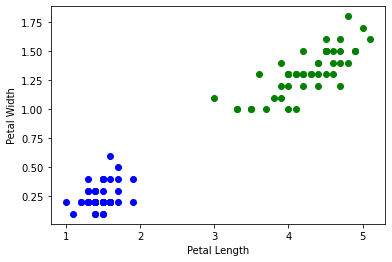

In [31]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], c='b')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], c='g')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Sepal Width')

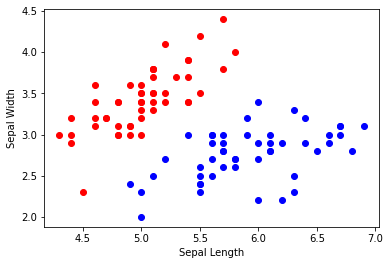

In [33]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], c='r')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], c='b')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [34]:
X = df.drop(['target','flower_name'], axis=1)
y = df.target

In [35]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
knn.score(X_train,y_train)

0.9428571428571428

In [81]:
knn.score(X_test,y_test)

1.0

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
cm = confusion_matrix(y_test,knn.predict(X_test))
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [84]:
import seaborn as sns

Text(87.0, 0.5, 'Predicted')

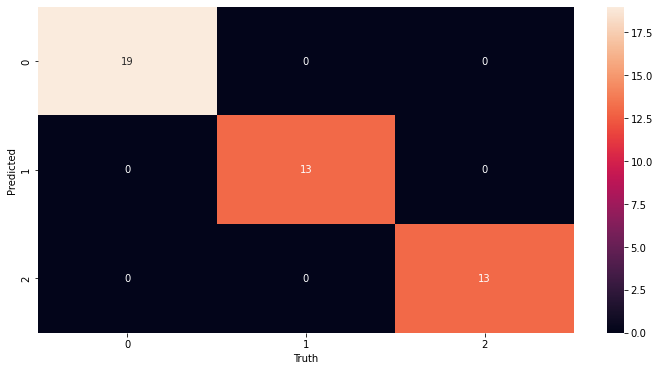

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [88]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

